## Exploratory Data Analysis (EDA)

In this section, we will conduct exploratory data analysis (EDA) to gain a deeper understanding of the characteristics and behaviors of the customers. The goal is to identify relevant patterns, detect potential anomalies, and understand the distribution of the selected variables for segmentation. Additionally, the relationships between variables will be analyzed through visualizations and statistical metrics that will allow us to make informed decisions for the next stage of the process: customer segmentation.

The key variables to analyze include the number of clicks (`n_clicks`), the number of visits (`n_visitas`), the purchase amount (`monto_compras`), the discount amount (`monto_descuentos`), the time since the first purchase (`dias_primera_compra`), and the customer profile (`info_perfil`).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Util functions
def hist(df, column):
    plt.figure(figsize=(6, 4))
    df[column].plot(kind="hist")
    plt.title("Distribution of "+column)
    plt.ylabel("Values")
    plt.show()

def box(df, column):
    plt.figure(figsize=(6, 4))
    df[column].plot(kind="box")
    plt.title("Distribution of "+column)
    plt.ylabel("Values")
    plt.show()

In [3]:
# Loading cleaned dataset
dataset_path = "../data/processed/cleaned_dataset_no_outliers.csv"
df = pd.read_csv(dataset_path)
df = df.drop(columns=["ID"])

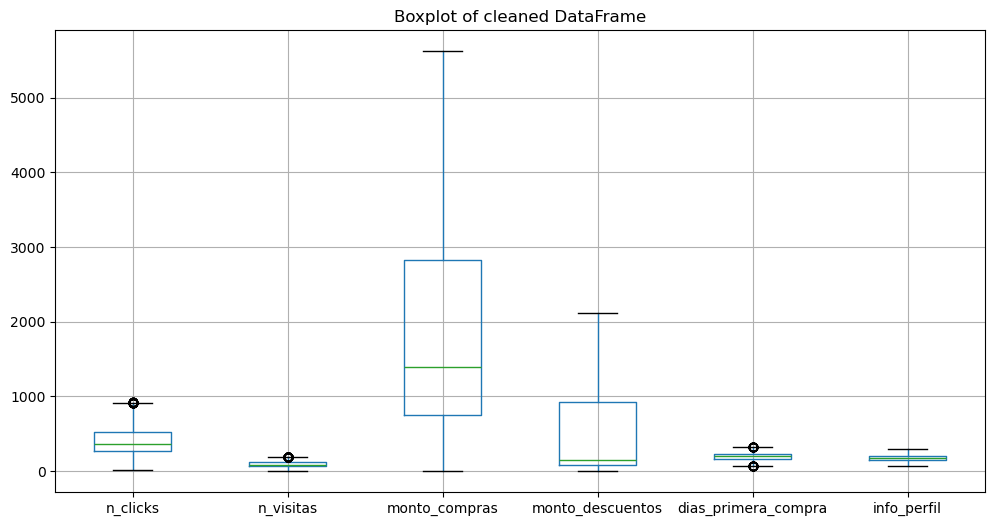

In [4]:
# Viewing the distributions of all columns cleaned
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot of cleaned DataFrame")
plt.show()

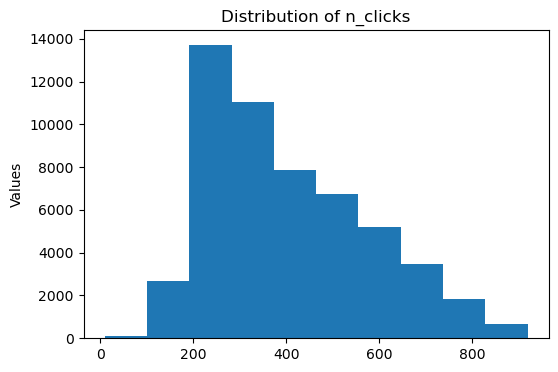

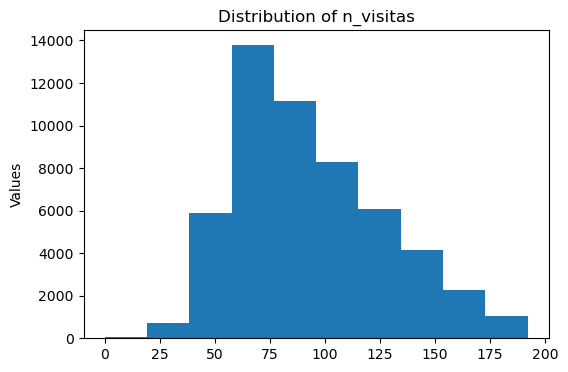

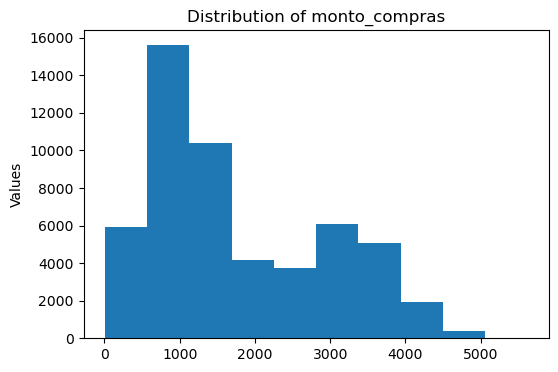

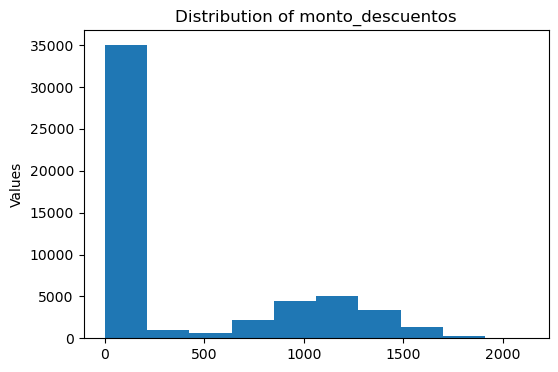

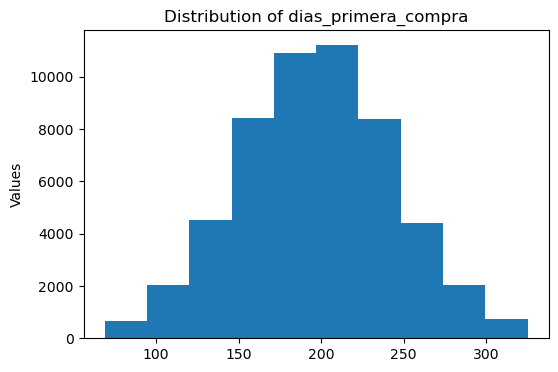

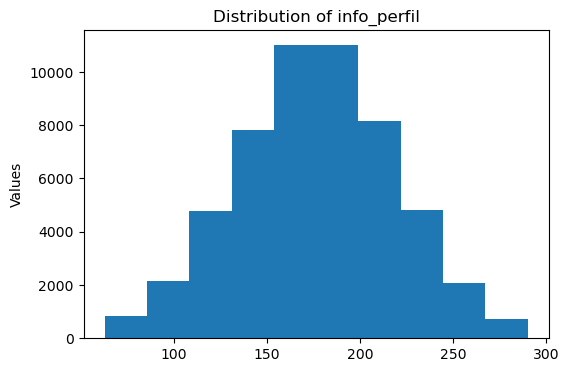

In [5]:
for _ in df.columns.tolist():
    hist(df, _)

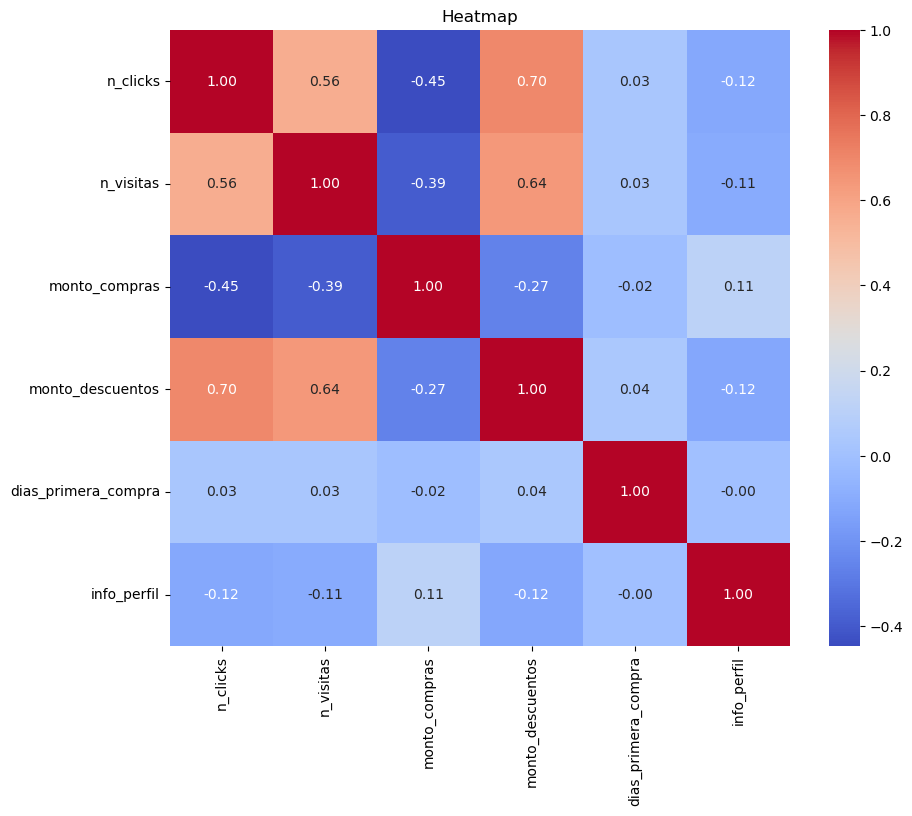

In [6]:
# Viewing correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap")
plt.show()

### Scaling the Data
Since different features may have different scales (e.g., `n_clicks` and `monto_compras`), it's important to scale the data so that all features are on a similar scale. This can be done using **StandardScaler** or **MinMaxScaler** from scikit-learn.

In [7]:
features = df
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Clustering the Data  
The main method used for segmentation is **K-Means clustering**, a widely used algorithm for unsupervised learning. The number of clusters (K) can be determined using methods such as the **Elbow Method** or **Silhouette Score**.

#### Determining the number of clusters (K)
Once the data is scaled, you need to determine how many clusters you want to use. The optimal number of clusters can be determined using the **Elbow Method** or **Silhouette Score**.

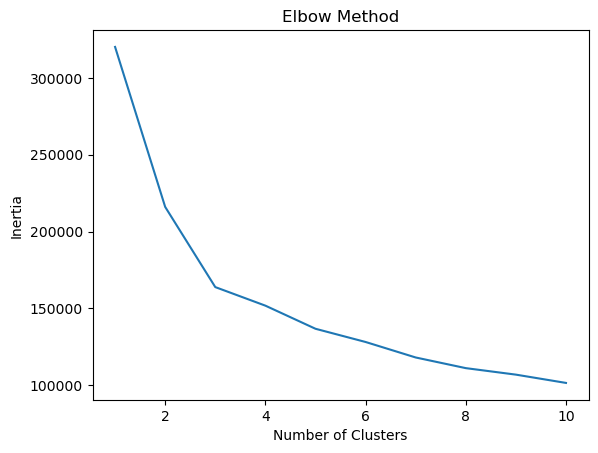

In [8]:
# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
# Silhouette score
# from sklearn.metrics import silhouette_score
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_features)
#     score = silhouette_score(scaled_features, kmeans.labels_)
#     print(f'K = {k}, Silhouette Score = {score}')

# Output:
# K = 2, Silhouette Score = 0.3169882304105618
# K = 3, Silhouette Score = 0.3118844573997931
# K = 4, Silhouette Score = 0.27203645847701036
# K = 5, Silhouette Score = 0.2547723614308543
# K = 6, Silhouette Score = 0.1922741652475423
# K = 7, Silhouette Score = 0.1913381666302927
# K = 8, Silhouette Score = 0.1919018301376818
# K = 9, Silhouette Score = 0.1900289280197304
# K = 10, Silhouette Score = 0.1886738683370912

It has been decided to use K-Means with 3 clusters, based on the results obtained from the **elbow method** and the **Silhouette Score** analysis, which indicated that 3 clusters provide an appropriate segmentation with good separation between the groups.

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [11]:
df.groupby('cluster').mean()

,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
cluster,,,,,,
0,589.540537,126.658861,1383.068644,1132.171170,200.087658,168.963847
1,384.030903,88.424186,680.656313,164.806094,195.911341,175.086996
2,253.239657,66.584163,3238.209864,80.638438,195.071559,185.095921


#### Cluster Analysis

##### Cluster 0:
This group appears to consist of **active customers**, as they have a relatively high number of **clicks and visits**. This suggests that these customers frequently browse the online store, which is generally associated with a **high level of interest** in the products.

- `monto_compras`: Although the purchase amount is moderate, what stands out is that this group has a **high discount amount (1132.17)**. This could suggest that these customers are **sensitive to discounts** or make purchases during promotions or sales.
- `dias_primera_compra`: On average, this group has been purchasing for about **200 days**, which could mean that these customers have been buying from the store for a considerable amount of time, but not long enough to be considered long-term customers (e.g., over 500 days).
- `info_perfil`: The **average value of 168.96** for this group is relatively low, which could indicate that they are **frequent customers but not necessarily the highest spenders or premium customers**.

##### Cluster 1:
This group has characteristics of **active customers but less engaged** compared to Cluster 0. The number of **clicks and visits** is lower, which could suggest that they don’t browse as frequently, or that their **interest is more specific**.

- `monto_compras`: While their total spending is **lower** than Cluster 0, it is still significant, indicating that although they may not be as frequent in terms of visits, they still make **moderate-sized purchases**.
- `monto_descuentos`: This group has the **lowest discount amount** of the three clusters, which could suggest that they are **less sensitive to promotions** or simply buy less during sales.
- `dias_primera_compra`: The average of **195 days** indicates that these customers are relatively established with the store, but not necessarily the first to arrive or the most loyal.
- `info_perfil`: With a value of **175.09**, it is likely that these customers are **moderate in terms of purchasing behavior**, not very different from the previous group, but with a more balanced profile.

##### Cluster 2:
This group seems to be made up of **high-value customers** who show a low level of interaction in terms of **clicks and visits**. This could indicate that they **make large purchases but don’t browse as much**, possibly being direct buyers or customers with a clear purchase intent.

- `monto_compras`: Their purchase amount is considerably **higher (3238.21)** compared to the other clusters. This suggests that these customers **make large-volume purchases**, possibly fewer times, but with significant value in each purchase.
- `monto_descuentos`: The **discount amount is low (80.64)**, which could indicate that they are **not as influenced by promotions** or that they buy during times when there are no significant discounts.
- `dias_primera_compra`: The value of **195.07 days** is similar to the other two clusters, indicating that these customers are neither new nor old, but at an intermediate stage in their relationship with the store.
- `info_perfil`: With a value of **185.10**, these customers seem to have a slightly **more purchase-oriented profile**, but they are not necessarily the most frequent in terms of visits or clicks.

##### General Conclusion:
- **Cluster 0**: Active and highly engaged customers, sensitive to discounts, with moderate purchase behavior and a frequent customer profile.
- **Cluster 1**: Moderately active customers, with medium-sized purchases, and less influenced by discounts. They tend to be stable customers but not extremely loyal.
- **Cluster 2**: High-value customers in terms of purchases, but with low interaction, indicating direct buyers or one-time purchasers. They are less sensitive to discounts.

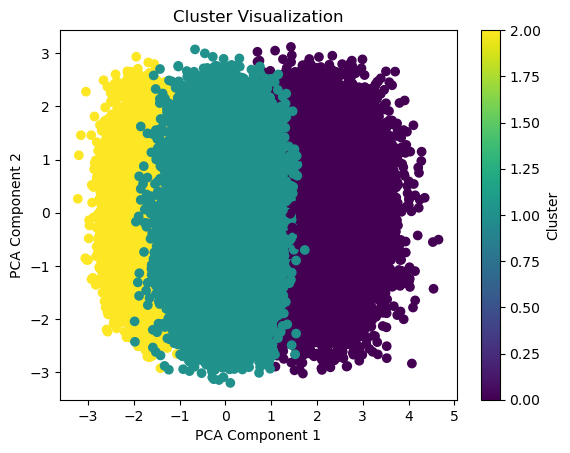

In [12]:
# Viewing clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster'])
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()